### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [6]:
#PART A: Data Wrangling
import pandas as pd
import numpy as np
df1= pd.read_csv('student_academic.csv')
df2= pd.read_csv('student_activities.csv')
print(df1.shape, df1.dtypes)
print()
print(df2.shape, df2.dtypes)
#df1.info()
df1=df1.dropna()
df2=df2.dropna()
print()
#df1_cleaned.info()
df1['GPA_change']= df1['GPA_Sem2']-df1['GPA_Sem1']
#print(df1)
df1['StudentIntensity']=df1['Hours_Study']/df1['Credits_Enrolled']
#df1['AttendanceFlag']= 1 if df1['AttendanceRate']>=0.90 else 0
df1['AttendanceFlag']=(df1['AttendanceRate']>=0.90)

(250, 9) StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object

(364, 4) StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object



---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

In [8]:
# You can break this cell up if you prefer.
merged_df=pd.merge(df1,df2, on='StudentID', how='inner')
merged_df.to_csv('merged_file.csv', index=False)

In [10]:
df3= pd.read_csv('merged_file.csv')

In [12]:
top_improver=df3.nlargest(10,'GPA_change')
print(top_improver)

     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
79        1072           English     Junior      1.85      3.30   
80        1072           English     Junior      1.85      3.30   
81        1072           English     Junior      1.85      3.30   
243       1203  Computer Science     Junior      2.47      3.89   
244       1203  Computer Science     Junior      2.47      3.89   
245       1203  Computer Science     Junior      2.47      3.89   
105       1093         Economics     Junior      2.50      3.88   
106       1093         Economics     Junior      2.50      3.88   
107       1093         Economics     Junior      2.50      3.88   
268       1223         Economics  Sophomore      2.34      3.58   

     Credits_Enrolled  Hours_Study  AttendanceRate Scholarship  GPA_change  \
79                 14         11.0            0.96          No        1.45   
80                 14         11.0            0.96          No        1.45   
81                 14       

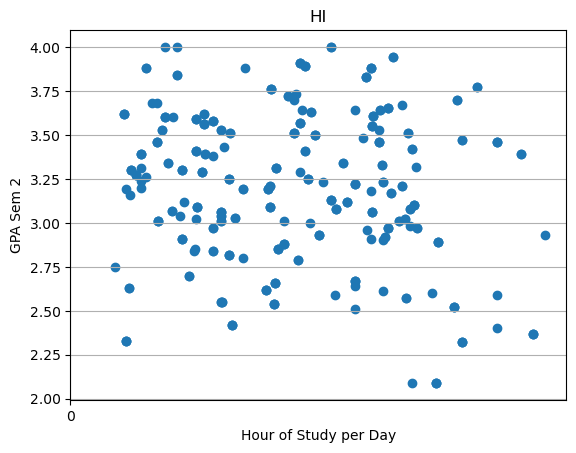

[[ 1.         -0.12784222]
 [-0.12784222  1.        ]]
Pearson correlation between student intensity and GPA of Semester 2: -0.128


In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df3['StudentIntensity'],df3['GPA_Sem2'], marker='o')
plt.title('HI')
plt.xlabel('Hour of Study per Day')
plt.ylabel('GPA Sem 2')
plt.xticks(range(0,1))
plt.grid(True)
plt.show()
intensity = df3['StudentIntensity'].to_numpy()
gpasem2 = df3['GPA_Sem2'].to_numpy()
corr = np.corrcoef(intensity,gpasem2)
print(corr)
corr=corr[0,1]
print(f"Pearson correlation between student intensity and GPA of Semester 2: {corr:.3f}")

AttendanceFlag
False    3.240640
True     3.142061
Name: GPA_Sem2, dtype: float64
AttendanceFlag
False    0.398207
True     0.453536
Name: GPA_Sem2, dtype: float64


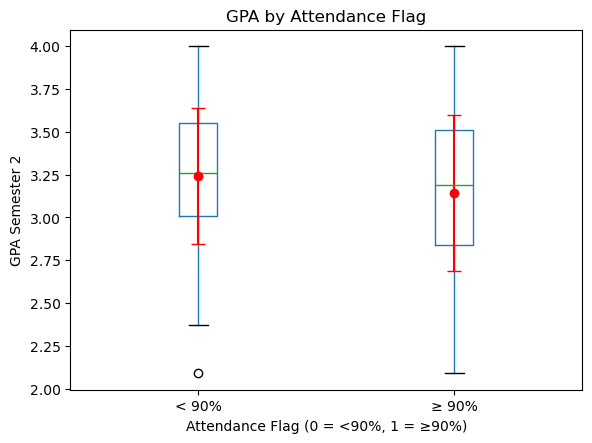

In [76]:
mean_attendance = df3.groupby('AttendanceFlag')['GPA_Sem2'].mean()
print(mean_attendance)
std_attendance = df3.groupby('AttendanceFlag')['GPA_Sem2'].std()
print(sd_attendance)

import matplotlib.pyplot as plt

ax = df3.boxplot(column='GPA_Sem2', by='AttendanceFlag', grid=False)
plt.title('GPA by Attendance Flag')
plt.suptitle('')
plt.xlabel('Attendance Flag (0 = <90%, 1 = ≥90%)')
plt.ylabel('GPA Semester 2')
plt.xticks([1, 2], ['< 90%', '≥ 90%'])
x_positions = [1, 2]
plt.errorbar(x=x_positions,
             y=mean_attendance,
             yerr=std_attendance,
             fmt='o',
             color='red',
             capsize=5,
             label='Mean ± SD')

plt.grid(True)
plt.show()


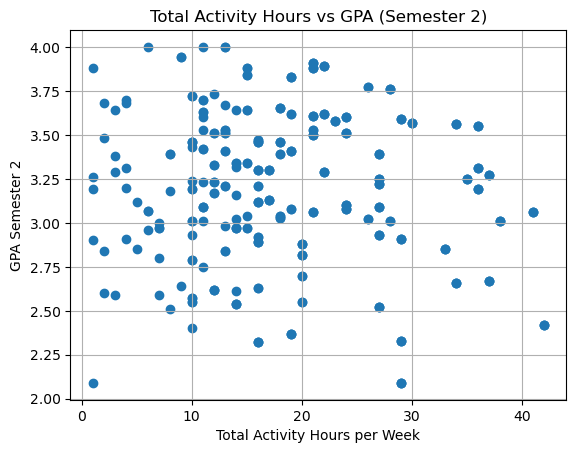

In [78]:
activity_hours = df3.groupby('StudentID')['HoursPerWeek'].sum()
df3['TotalActivityHours'] = df3['StudentID'].map(activity_hours)
plt.figure()
plt.scatter(df3['TotalActivityHours'], df3['GPA_Sem2'])
plt.title('Total Activity Hours vs GPA (Semester 2)')
plt.xlabel('Total Activity Hours per Week')
plt.ylabel('GPA Semester 2')
plt.grid(True)
plt.show()

Text(0, 0.5, 'GPA Semester 2')

<Figure size 800x600 with 0 Axes>

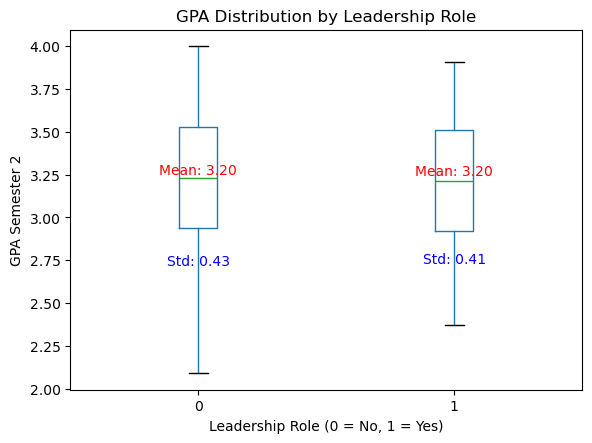

In [95]:
df3['LeadershipRoleFlag'] = df3['LeadershipRole'].apply(lambda x: 1 if x == 'Yes' else 0)
leadership_summary = df3.groupby('StudentID')['LeadershipRoleFlag'].max()
plt.figure(figsize=(8, 6))
ax = df3.boxplot(column='GPA_Sem2', by='LeadershipRoleFlag', grid=False)
group_stats = df3.groupby('LeadershipRoleFlag')['GPA_Sem2'].agg(['mean', 'std'])
for i, (mean, std) in enumerate(zip(group_stats['mean'], group_stats['std'])):
    plt.text(i + 1, mean + 0.05, f'Mean: {mean:.2f}', ha='center', color='red')
    plt.text(i + 1, mean - std - 0.05, f'Std: {std:.2f}', ha='center', color='blue')
mean_gpa = df3.groupby('LeadershipRoleFlag')['GPA_Sem2'].mean()
std_gpa = df3.groupby('LeadershipRoleFlag')['GPA_Sem2'].std()
plt.title('GPA Distribution by Leadership Role')
plt.suptitle('')
plt.xlabel('Leadership Role (0 = No, 1 = Yes)')
plt.ylabel('GPA Semester 2')

In [99]:
df3['ScholarshipFlag'] = df3['Scholarship'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
major_stats = df3.groupby('Major').agg({
    'GPA_Sem2': 'mean',
    'Hours_Study': 'mean',
    'ScholarshipFlag': 'mean'
}).reset_index()
major_stats['ScholarshipFlag'] = major_stats['ScholarshipFlag'] * 100
major_stats.rename(columns={
    'GPA_Sem2': 'MeanGPA',
    'Hours_Study': 'MeanStudyHours',
    'ScholarshipFlag': 'ScholarshipPercent'
}, inplace=True)
print(major_stats.round(2))

              Major  MeanGPA  MeanStudyHours  ScholarshipPercent
0           Biology     3.21           25.37               39.13
1  Computer Science     3.25           24.65               49.30
2         Economics     3.16           21.42               33.33
3           English     3.21           21.88               20.93
4        Psychology     3.16           23.20               50.70


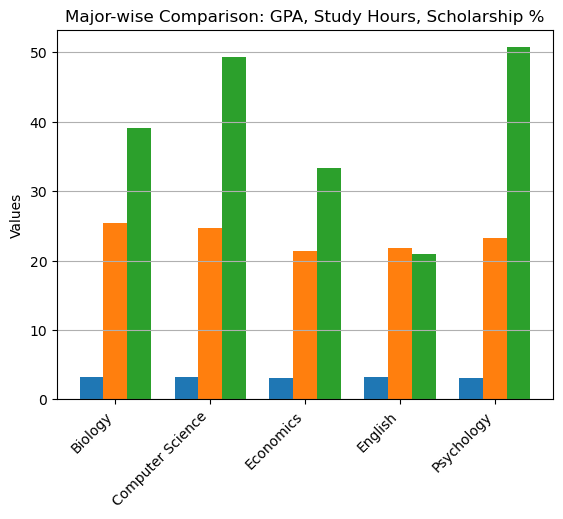

In [103]:
majors = major_stats['Major']
plt.figure()
x = np.arange(len(majors))
plt.bar(x - 0.25, major_stats['MeanGPA'], 0.25, label='Mean GPA')
plt.bar(x, major_stats['MeanStudyHours'], 0.25, label='Mean Study Hours')
plt.bar(x + 0.25, major_stats['ScholarshipPercent'], 0.25 , label='Scholarship %')
plt.xticks(x, majors, rotation=45, ha='right')
plt.ylabel('Values')
plt.title('Major-wise Comparison: GPA, Study Hours, Scholarship %')
plt.grid(axis='y')

In [117]:
df3['GPA_Z'] = (df3['GPA_Sem2'] - df3['GPA_Sem2'].mean()) / df3['GPA_Sem2'].std()
df3['Attendance_Z'] = (df3['AttendanceRate'] - df3['AttendanceRate'].mean()) / df3['AttendanceRate'].std()
df3['Study_Z'] = (df3['Hours_Study'] - df3['Hours_Study'].mean()) / df3['Hours_Study'].std()
df3['SuccessScore'] = df3[['GPA_Z', 'Attendance_Z', 'Study_Z']].mean(axis=1)
top15 = df3.sort_values('SuccessScore', ascending=False)[[
    'StudentID', 'Major', 'GPA_Sem2', 'AttendanceRate', 'Hours_Study', 'SuccessScore'
]].head(15)

print(top15.round(2))

     StudentID             Major  GPA_Sem2  AttendanceRate  Hours_Study  \
34        1034  Computer Science      3.91            0.99         29.0   
32        1034  Computer Science      3.91            0.99         29.0   
33        1034  Computer Science      3.91            0.99         29.0   
147       1127           English      3.46            0.99         39.0   
148       1127           English      3.46            0.99         39.0   
146       1127           English      3.46            0.99         39.0   
108       1095  Computer Science      3.53            0.96         39.0   
46        1042  Computer Science      3.51            0.97         38.0   
45        1042  Computer Science      3.51            0.97         38.0   
165       1144        Psychology      3.46            0.97         39.0   
166       1144        Psychology      3.46            0.97         39.0   
167       1144        Psychology      3.46            0.97         39.0   
8         1011        Psy

---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

## Change me
* Bullet points  **boldface**
* Because the Pearson correlation is -0.128, there is a weak negative connection between the hours study and GPA improvement, meaning the more hours spent studying doesn't equal to GPA improvement
* Students who have higher activity hours tend to have lower GPA and vice versa, even though there are a wide range of GPA we get for lower activity hours, the outliner with highest activity hours is among top 7 of the lowest GPA.
* Based on the bar graph about relations among hours study, GPA, and scholarship, we can conclude that the amount of scholarship students receive aren't based on how many hours they study or what their GPA is, but rather external factors that determine what criterias are considered when giving out scholarship.
* In our data for GPA change, we can see that students who study more but has lower attendance rate still do worse than those who study less but has better attendance.
* The rest of the data is hard to elaborate because the database was created randomly, there are unclear trends that are confusing. For example, students with higher GPA study less than those with lower GPA, and higher GPA and less hours of study indicate lower success score and vice versa, assuming attendance rate is the same.